In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from ogb.lsc import MAG240MDataset, MAG240MEvaluator

In [2]:
root = '.'
dataset = MAG240MDataset(root=root)
train_idx = dataset.get_idx_split('train')
valid_idx = dataset.get_idx_split('valid')
test_idx = dataset.get_idx_split('test')

all_idx = np.concatenate([train_idx, valid_idx, test_idx])
all_idx.shape

(1398159,)

In [3]:
distri_df = pd.DataFrame(all_idx)
distri_df.columns = ['idx']
distri_df['year'] = dataset.all_paper_year[all_idx]
distri_df['label'] = dataset.paper_label[all_idx].astype(int)
distri_df

,idx,year,label
0,6,2014,17
1,9,2014,29
2,29,2015,38
3,63,2005,5
4,85,2013,1
...,...,...,...
1398154,121745984,2020,-1
1398155,121747801,2020,-1
1398156,121747833,2020,-1
1398157,121749646,2020,-1


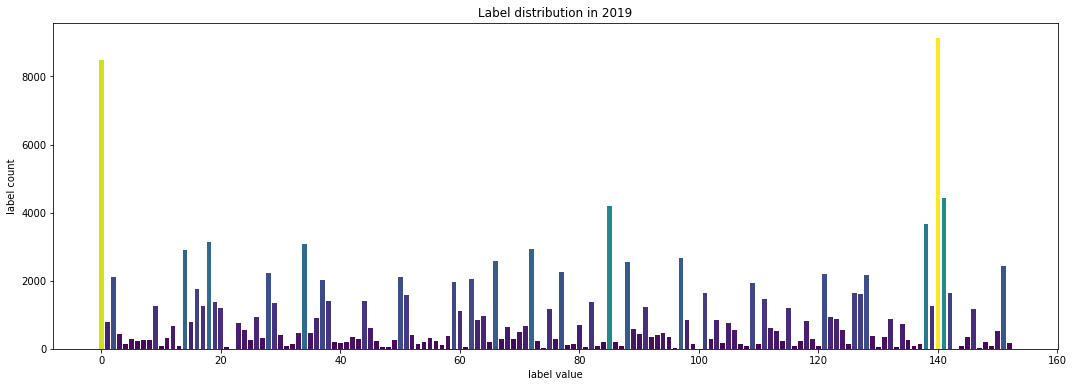

In [21]:
# Draw the label distribution map of a certain year

distri_2019_df = distri_df[distri_df['year'] == 2019]['label'].value_counts().reset_index()
distri_2019_df.columns = ['year', 'count']
distri_2019_df = distri_2019_df.sort_values('year')

d = {}
for year, count in zip(distri_2019_df['year'], distri_2019_df['count']):
    d[year] = count
count_list = []
for i in range(153):
    if i in d:
        count_list.append(d[i])
    else:
        count_list.append(0)

plt.figure(figsize=(18, 6))
map_vir = cm.get_cmap(name='viridis')
norm = plt.Normalize(min(count_list), max(count_list))
norm_y = norm(count_list)
color = map_vir(norm_y)
plt.bar(range(153), count_list, color=color)
plt.xlabel('label value')
plt.ylabel('label count')
plt.title('Label distribution in 2019')
plt.show()

In [22]:
# Calculate the correlation coefficient of label distribution between years 

def label_count(year, distri_df):
    distri_year_df = distri_df[distri_df['year'] == year]['label'].value_counts().reset_index()
    distri_year_df.columns = ['year', 'count']
    distri_year_df = distri_year_df.sort_values('year')

    d = {}
    for year, count in zip(distri_year_df['year'], distri_year_df['count']):
        d[year] = count
    count_list = []
    for i in range(153):
        if i in d:
            count_list.append(d[i])
        else:
            count_list.append(0)
    return count_list

year_count_list = []
for year in range(2019, 2009, -1):
    count_list = label_count(year, distri_df)
    year_count_list.append(count_list)
    
year_count_df = pd.DataFrame(year_count_list).T
year_count_df.columns = range(2019, 2009, -1)
corr_df = year_count_df.corr()
corr_df

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
2019,1.000000,0.966265,0.880882,0.794133,0.705853,0.639406,0.586805,0.567365,0.493886,0.469587
2018,0.966265,1.000000,0.962482,0.891083,0.808499,0.748442,0.688444,0.656111,0.589612,0.561159
2017,0.880882,0.962482,1.000000,0.971922,0.917374,0.871789,0.817465,0.781578,0.725966,0.694245
2016,0.794133,0.891083,0.971922,1.000000,0.981405,0.955799,0.907212,0.876927,0.830478,0.801016
2015,0.705853,0.808499,0.917374,0.981405,1.000000,0.989849,0.951359,0.929746,0.893225,0.866318
2014,0.639406,0.748442,0.871789,0.955799,0.989849,1.000000,0.968676,0.954045,0.924707,0.902506
2013,0.586805,0.688444,0.817465,0.907212,0.951359,0.968676,1.000000,0.987855,0.970545,0.948953
2012,0.567365,0.656111,0.781578,0.876927,0.929746,0.954045,0.987855,1.000000,0.988973,0.976085
2011,0.493886,0.589612,0.725966,0.830478,0.893225,0.924707,0.970545,0.988973,1.000000,0.992815
2010,0.469587,0.561159,0.694245,0.801016,0.866318,0.902506,0.948953,0.976085,0.992815,1.000000


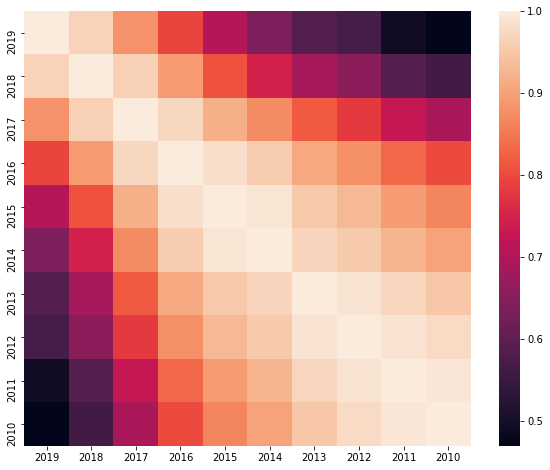

In [23]:
fig = plt.figure(figsize=(10, 8))
sns_plot = sns.heatmap(corr_df)
fig.show()